# Learning & applied with Normalization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/wine-data/wine_data.csv', header= None, usecols= [0, 1, 2])
df.columns= ['Class Label', 'Alcohol', 'Malic Acid']

In [4]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

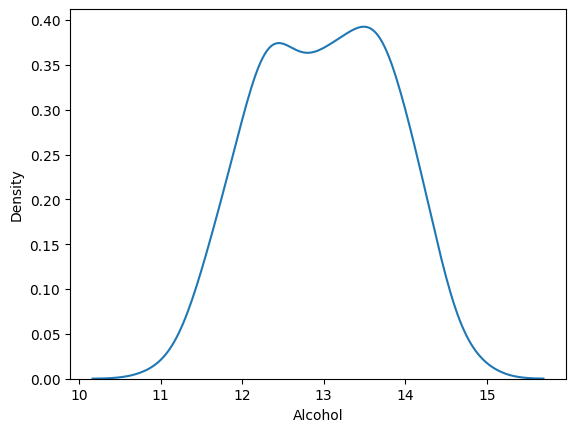

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

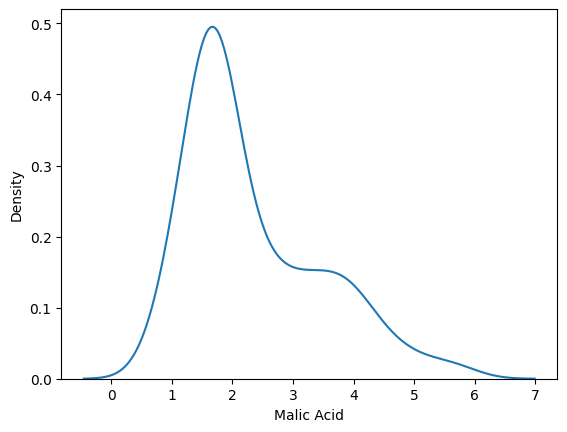

In [6]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

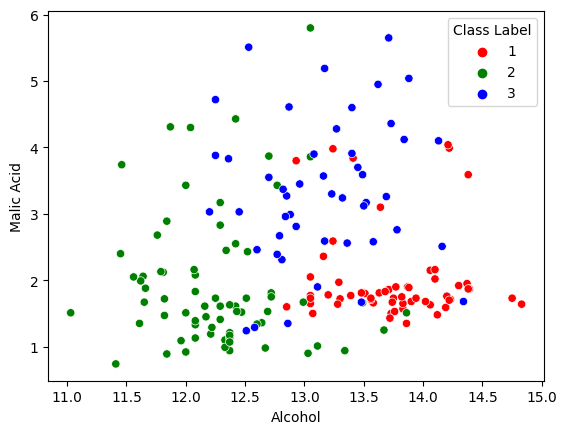

In [7]:
color_dict= {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(data= df, x= 'Alcohol', y= 'Malic Acid', hue= 'Class Label', palette= color_dict)

# Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label', axis= 1), df['Class Label'], test_size= 0.3, random_state= 0) 

In [10]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

# Model Preprocessing for MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [14]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [15]:
# np.round(X_train.describe(), 1)
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [16]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


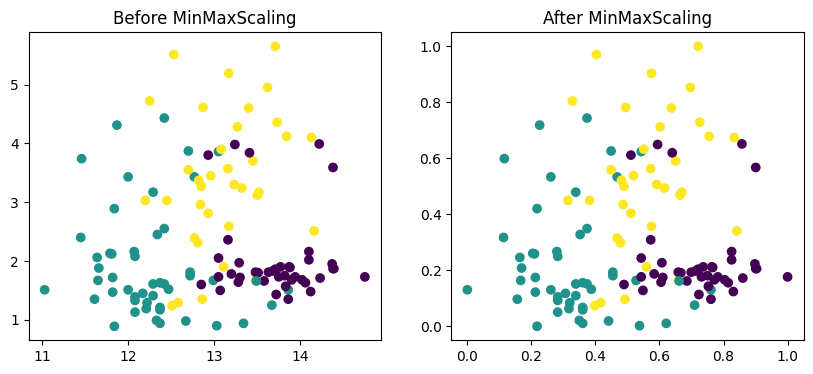

In [17]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c= y_train)
ax1.set_title('Before MinMaxScaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c= y_train)
ax2.set_title('After MinMaxScaling')
plt.show()

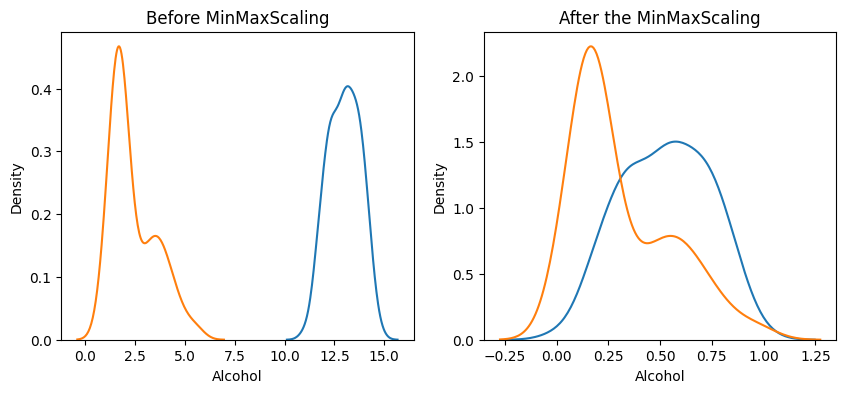

In [18]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

#Before
ax1.set_title('Before MinMaxScaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1) 
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

#after
ax2.set_title('After the MinMaxScaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2) 
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

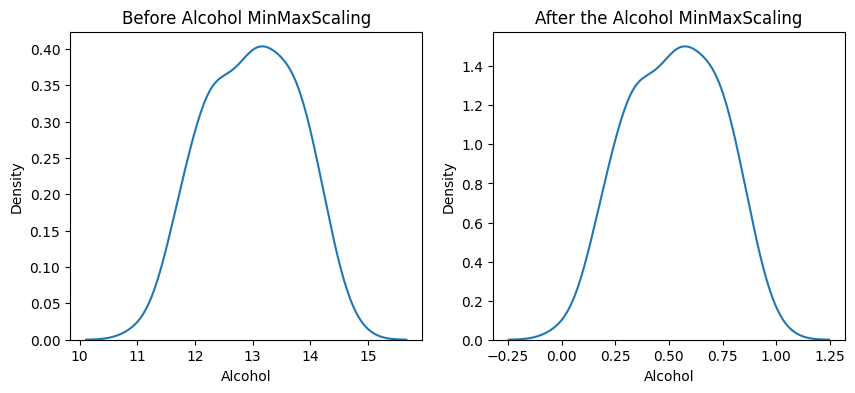

In [19]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10, 4))

ax1.set_title('Before Alcohol MinMaxScaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

ax2.set_title('After the Alcohol MinMaxScaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

plt.show()

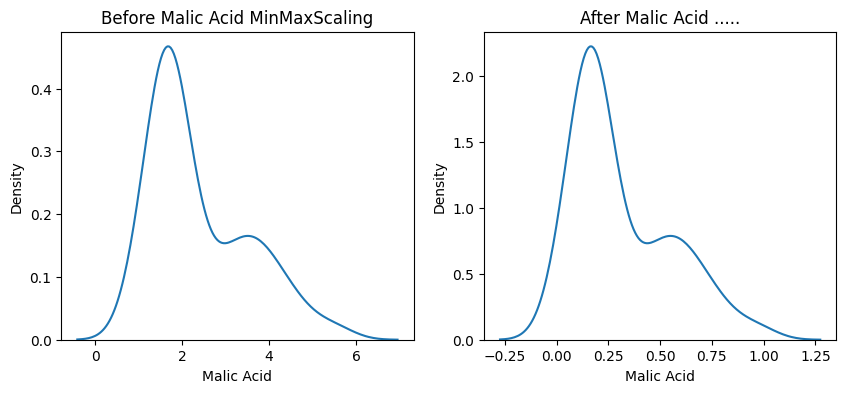

In [20]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Before Malic Acid MinMaxScaling')
sns.kdeplot(X_train['Malic Acid'], ax= ax1)

ax2.set_title('After Malic Acid .....')
sns.kdeplot(X_train_scaled['Malic Acid'], ax= ax2)

plt.show()